In [1]:
import functools

import jax
import jax.numpy as jnp
import jax_spe as spe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jax.config.update('jax_platform_name', 'cpu')

In [3]:
# number of layers to simulate
# n_layers = 8

# dimension for the keys and queries
keys_dim = 64
spe_dim = 32
num_heads = 8
num_realizations = 64
num_sines = 10

In [17]:
# create the positional encoder
encoder = spe.SineSPE(num_heads=num_heads, in_features=spe_dim, num_sines=num_sines, num_realizations=num_realizations)
params = encoder.init(jax.random.PRNGKey(0), jax.random.PRNGKey(0), 3000)
print(params)

FrozenDict({'params': {'freqs': DeviceArray([[[-6.5056696, -5.5189486, -5.7354164, ..., -4.379528 ,
               -6.1791058, -6.367861 ],
              [-3.0828373, -4.887449 , -5.571473 , ..., -5.7450094,
               -4.7627077, -5.31232  ],
              [-4.982101 , -6.658656 , -5.1411715, ..., -3.6020892,
               -4.1659284, -5.8765755],
              ...,
              [-4.961108 , -4.947437 , -6.093878 , ..., -3.7349582,
               -6.5678334, -5.0429235],
              [-2.9298656, -5.7116985, -5.782169 , ..., -6.441283 ,
               -5.3144016, -6.017397 ],
              [-6.345909 , -5.761214 , -3.8409843, ..., -3.660585 ,
               -6.407972 , -4.757781 ]],

             [[-5.305468 , -6.3146086, -3.499683 , ..., -4.629723 ,
               -6.7010813, -5.9198003],
              [-5.5899897, -3.9660268, -6.386937 , ..., -6.2987823,
               -5.247415 , -4.7350674],
              [-4.093874 , -4.317995 , -4.3486843, ..., -5.0024204,
               

In [18]:
@jax.jit
def encode(params, q, k):
    qbar, kbar = encoder.apply(params, jax.random.PRNGKey(1), k.shape[1])
    return spe.apply_spe(q, qbar), spe.apply_spe(k, kbar)

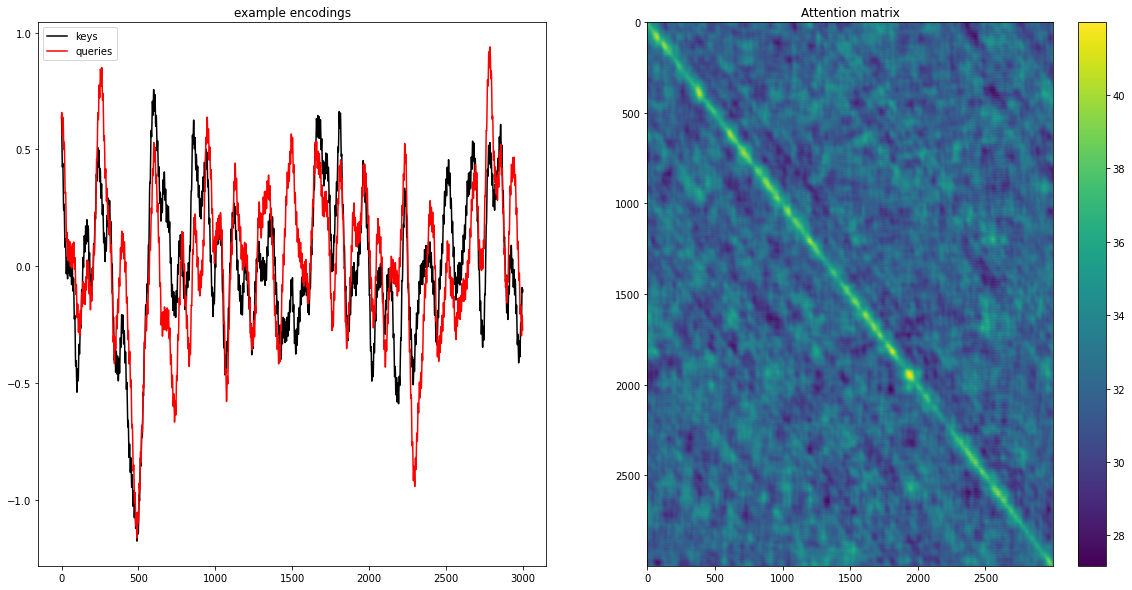

In [20]:
n = 3000
batchsize=16

# generate some encodings of shape (batchsize, num, n)
q = jnp.ones((batchsize, n, num_heads, keys_dim))
k = jnp.ones((batchsize, n, num_heads, keys_dim))

from tqdm import tqdm

q, k = encode(params, q, k)

A = q[0,:,0,:] @ k[0,:,0,:].T

plt.figure(figsize=[20,10]);
plt.subplot(121)
plt.plot(k[0,:,0,0],'k');
plt.plot(q[0,:,0,0],'r');
plt.title('example encodings');
plt.legend(['keys', 'queries']);

# display the average dot product
plt.subplot(122);
plt.imshow(A, aspect='auto', interpolation='nearest');
plt.title('Attention matrix');
plt.colorbar();
